<h1 style='font-size:2rem;color:blue;'>Project on identifying animals and flowers :</h1>

Padmanabha Bose,
I-PhD- Physics,  
Computer code : PBA117


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


<p><b> All the classifications :</b></p>

In [105]:
data = "C:\Data_science"
Categories = ["bougainvilla","Elephant","jasmine","lion","lotus","red rose","shark","spider","tulip","zebra"]
listdata=[]
sX = 100
sY = 100
for category in Categories:
  path=os.path.join(data, category)#joined all the paths
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    img_array=cv2.resize(img_array,(sX, sY))
    listdata.append([img_array])
    
listdata=np.array(listdata)

In [106]:
print(np.shape(listdata[:,0,0,0]))#I tried to give all the 10 datasets, but somehow jupyter accepted only 5. I have also included a snippet of the folder

(50,)


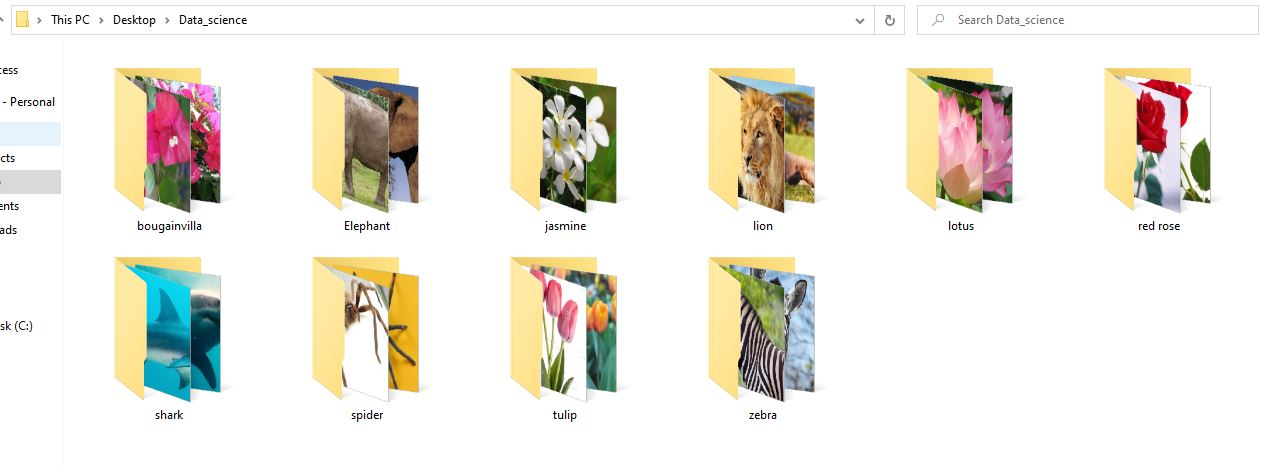

In [107]:
print(np.shape(listdata))

(50, 1, 100, 100)


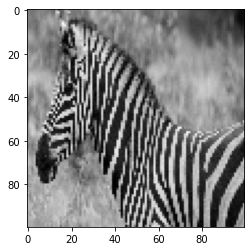

In [108]:
IMG_SIZE=100

new_array= cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [109]:
N=[]
for i in range(5):
  for j in range(10):
    N.append(i)


In [110]:
def print_natural(images, target, top_n):
    fig = plt.figure(figsize=(50,50))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(sX,sY,i+1,xticks=[],yticks=[]) # each image is a 20x20 matrix
        p.imshow(images[i,0,:,:], cmap=plt.cm.bone)
        p.text(0,18,str(target[i]))
        p.text(0,60,str(i))

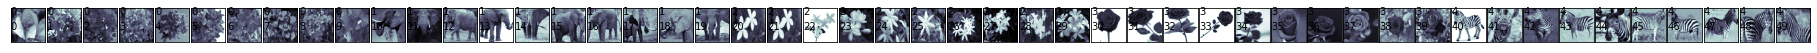

In [111]:
print_natural(listdata,N,50 )#data containg bougainvilla, elephant, jasmine, red rose and zebra only

In [112]:
 y=listdata.reshape(len(listdata), -1)

In [113]:
print(np.shape(y))

(50, 10000)


In [114]:
from sklearn.svm import SVC
svc_1 = SVC(kernel ='poly')
#svc_1 = SVC(kernel ='linear')
#scv_1 = SVC(kernel = 'rbf')
from sklearn.model_selection import train_test_split

test_size =[0.05,0.2,0.3,0.4,0.5, 0.6, .7, .8, .9, .95]
t1=[]
t2=[]
for i in test_size:
  X_train, X_test, y_train, y_test = train_test_split(y, N, test_size=i, random_state=5)
  svc_1.fit(X_train, y_train)

  train_score=svc_1.score(X_train, y_train)
  print('Score for training set',train_score)
  
  test_score=svc_1.score(X_test, y_test)
  t1.append(test_score)
  t2.append(train_score)
  print('Score for test set ratio ' + str(i) + " = " + str(test_score)  )
  print('--')
print(t1)

Score for training set 0.9787234042553191
Score for test set ratio 0.05 = 0.3333333333333333
--
Score for training set 0.975
Score for test set ratio 0.2 = 0.5
--
Score for training set 0.9714285714285714
Score for test set ratio 0.3 = 0.5333333333333333
--
Score for training set 0.9666666666666667
Score for test set ratio 0.4 = 0.4
--
Score for training set 0.96
Score for test set ratio 0.5 = 0.36
--
Score for training set 0.95
Score for test set ratio 0.6 = 0.16666666666666666
--
Score for training set 1.0
Score for test set ratio 0.7 = 0.17142857142857143
--
Score for training set 1.0
Score for test set ratio 0.8 = 0.175
--
Score for training set 1.0
Score for test set ratio 0.9 = 0.1111111111111111
--
Score for training set 1.0
Score for test set ratio 0.95 = 0.10416666666666667
--
[0.3333333333333333, 0.5, 0.5333333333333333, 0.4, 0.36, 0.16666666666666666, 0.17142857142857143, 0.175, 0.1111111111111111, 0.10416666666666667]


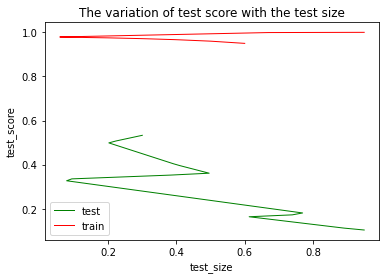

In [115]:
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

f1=interpolate.interp1d(t1, test_size, kind='linear')  # or simply, f=interpolate.interp1d(x_data, y_data)  
f2=interpolate.interp1d(t2, test_size, kind='linear')
xgrids=np.linspace(np.min(t1), np.max(t1), 51)
xgrids1=np.linspace(np.min(t2), np.max(t2), 51)
ygrids_1=f1(xgrids)
ygrids1=f2(xgrids1)
plt.plot(ygrids_1,xgrids,'-',color='g',linewidth=1,label="test")

plt.plot(ygrids1,xgrids1,'-',color='r',linewidth=1,label="train")
plt.legend()

plt.xlabel("test_size")
plt.ylabel("test_score")
plt.title('The variation of test score with the test size')

plt.show()

In [116]:
##animal vs. flower

#N = np.zeros(50)
#N[0:10] = 0
#N[10:20] = 1
#N[20:30] = 0
#N[30:40] = 0
#N[40:50] = 1

##wild or domestic
N = np.zeros(50)
N[0:10] = 0
N[10:20] = 1
N[20:30] = 0
N[30:40] = 0
N[40:50] = 1

In [117]:
from sklearn.svm import SVC
svc_1 = SVC(kernel ='poly')
#svc_1 = SVC(kernel ='linear')
#scv_1 = SVC(kernel = 'rbf')
from sklearn.model_selection import train_test_split

test_score1=[]
train_score1=[]
test_size =[0.05,0.2,0.3,0.4,0.5, 0.6, .7, .8, .9, .95]
for i in test_size:
  X_train, X_test, y_train, y_test = train_test_split(y, N, test_size=i, random_state=5)
  svc_1.fit(X_train, y_train)

  train_score=svc_1.score(X_train, y_train)
  print('Score for training set',train_score)
  
  test_score=svc_1.score(X_test, y_test)
  test_score1.append(test_score)
  train_score1.append(train_score)
  print('Score for test set ratio ' + str(i) + " = " + str(test_score)  )
  print('--')
print(test_score1) 
print(train_score1)

Score for training set 0.9787234042553191
Score for test set ratio 0.05 = 0.6666666666666666
--
Score for training set 0.975
Score for test set ratio 0.2 = 0.7
--
Score for training set 0.9714285714285714
Score for test set ratio 0.3 = 0.6
--
Score for training set 0.9666666666666667
Score for test set ratio 0.4 = 0.6
--
Score for training set 0.96
Score for test set ratio 0.5 = 0.6
--
Score for training set 0.95
Score for test set ratio 0.6 = 0.6
--
Score for training set 1.0
Score for test set ratio 0.7 = 0.6
--
Score for training set 1.0
Score for test set ratio 0.8 = 0.575
--
Score for training set 1.0
Score for test set ratio 0.9 = 0.6222222222222222
--
Score for training set 1.0
Score for test set ratio 0.95 = 0.625
--
[0.6666666666666666, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.575, 0.6222222222222222, 0.625]
[0.9787234042553191, 0.975, 0.9714285714285714, 0.9666666666666667, 0.96, 0.95, 1.0, 1.0, 1.0, 1.0]


In [118]:
y_pred_test=svc_1.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72        29
         1.0       0.54      0.37      0.44        19

    accuracy                           0.62        48
   macro avg       0.60      0.58      0.58        48
weighted avg       0.61      0.62      0.61        48



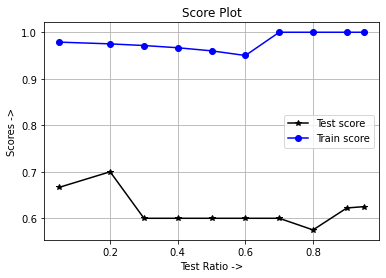

In [119]:
import matplotlib.pyplot as plt
x=test_size
y=test_score1
y1=train_score1
plt.plot(x,y,'k-*', label= 'Test score')
plt.plot(x,y1,'b-o', label= 'Train score')
plt.xlabel('Test Ratio ->')
plt.ylabel('Scores ->')
plt.title('Score Plot')
plt.legend()
plt.grid()
#plt.savefig("A_40_linear_",dpi=200)
plt.show()


<p><b> All code that I tried are attached below :</b></p>

In [18]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
data = "/content/drive/MyDrive/project_vehicle"
Categories = ["airplane","auto","bike","bus","car","heli","horse_cart","ship","tank","train"]
listdata=[]
sX = 100
sY = 100
for category in Categories:
  path=os.path.join(data, category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    img_array=cv2.resize(img_array,(sX, sY))
    listdata.append([img_array])
    
listdata=np.array(listdata)

In [9]:
training_data=[]

def create_training_data():

    for category in Categories:
        path=os.path.join(Datadir, category)
        class_num=Categories.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
            
        
            
create_training_data()            

In [10]:
print(training_data[5])

[array([[127, 122, 136, ..., 254, 254, 254],
       [ 57, 115, 139, ..., 254, 254, 254],
       [ 83, 104, 123, ..., 254, 254, 254],
       ...,
       [ 75,  60,  60, ..., 255, 255, 255],
       [ 78,  70,  61, ..., 255, 255, 255],
       [ 74,  71,  62, ..., 255, 255, 255]], dtype=uint8), 0]


In [11]:
import random
random.shuffle(training_data)

In [12]:
for sample in training_data:
 print (sample[1])

9
5
2
2
2
1
1
2
0
1
0
0
2
9
1
5
1
0
1
9
0
9
5
5
5
2
1
5
0
5
1
0
5
0
9
5
9
2
5
0
9
9
2
0
2
9
1
9
2
1


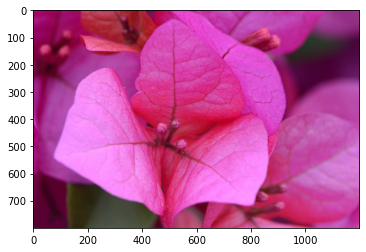

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
my_img=Image.open(r'C:\Data_science\bougainvilla\1.jpg')
plt.imshow(my_img)
plt.show()

In [14]:

print(training_data)

[[array([[170, 170, 170, ..., 171, 171, 171],
       [170, 169, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 169],
       ...,
       [171, 168, 176, ..., 153, 142, 180],
       [176, 167, 140, ..., 104, 170, 161],
       [153, 183, 154, ..., 191, 187, 238]], dtype=uint8), 9], [array([[149, 224, 228, ..., 128, 205, 124],
       [115, 158, 203, ..., 197, 153, 203],
       [120, 170, 204, ...,  85,  88, 198],
       ...,
       [ 39,  39,  85, ...,  19,  82, 147],
       [ 25,  41, 183, ...,  13,  11,  33],
       [ 41, 137, 139, ...,  12,  21,  92]], dtype=uint8), 5], [array([[ 54,  54,  54, ...,  58,  40,  50],
       [ 62,  57,  57, ..., 112, 151, 146],
       [ 67,  50,  57, ..., 104,  53, 144],
       ...,
       [ 50,  63,  81, ...,  64,  74,  94],
       [ 49,  44,  80, ...,  64,  62,  91],
       [ 33,  43,  38, ...,  51,  57,  91]], dtype=uint8), 2], [array([[ 28,  26,  49, ...,  25,  26,  24],
       [ 33,  25,  45, ...,  24,  24,  22],
       [ 30,  25,  46,

In [15]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("C:\Data_science", output="C:\Data_science_training_set",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 50 files [00:00, 326.62 files/s]


In [16]:
from sklearn.svm import SVC # Support Vector Classifier
svc_1 = SVC(kernel='linear')

In [17]:
print(np.shape(listdata[:,0]))

NameError: name 'listdata' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data,training_data , test_size=0.2, random_state=0)
from sklearn import metrics

svc_1.fit(X_train, y_train)

train_score=svc_1.score(X_train, y_train)
print('Score for training set',train_score)

test_score=svc_1.score(X_test, y_test)
print('Score for test set',test_score)

In [ ]:
path = 'C:\Data_science'
list_of_files = os.listdir(path)
data = np.empty(0)
for i in list_of_files:
    x = cv2.imread(os.path.join(path+i))
    data.append(x)

In [ ]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [ ]:
data_path = 'C:\Data_science'
os.listdir(data_path)

In [ ]:
base_name = 'identification'
width = 80
 
include = {'bougainvilla','Elephant','jasmine','lion','lotus','red rose','shark','spider','tulip','zebra'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


In [ ]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
print(faces.data)


In [ ]:
print(np.shape(listdata[:,0]))